# Eksperimen data playtennis

## Dataset Playtennis (csv) Eksternal 

Oleh : Bervianto Leo P - 13514047 dan Muhammad Reifiza - 13514103

## Fungsi _Plot Confusion Matrix_

Fungsi ini digunakan nanti, untuk memplot _confusion matrix_ dalam bentuk grafik.

Diambil dari http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Mempersiapkan data dari csv
Data playtennis.csv harus ada di dalam folder yang sama dengan _script_ ini dijalankan. 

In [2]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import pandas

playtennis_raw = pandas.read_csv("playtennis.csv")
playtennis = pandas.DataFrame(playtennis_raw)

## Preproses data playtennis
Karena nilai data playtennis semuanya dalam bentuk string, kalau langsung dimasukkan akan menyebabkan sklearn tree dan seaborn terbingung-bingung. Oleh karena itu, data playtennis mesti dipreproses dulu dengan meng-_encode_ nya nilai datanya menjadi float.

In [3]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
playtennis_transformed = playtennis.apply(encoder.fit_transform)
playtennis_train = playtennis_transformed.drop("playtennis", axis=1)
playtennis_classes = playtennis_transformed.iloc[:,-1]


## Visualisasi data playtennis

Data playtennis divisualisasikan dengan menggunakan _library_ seaborn

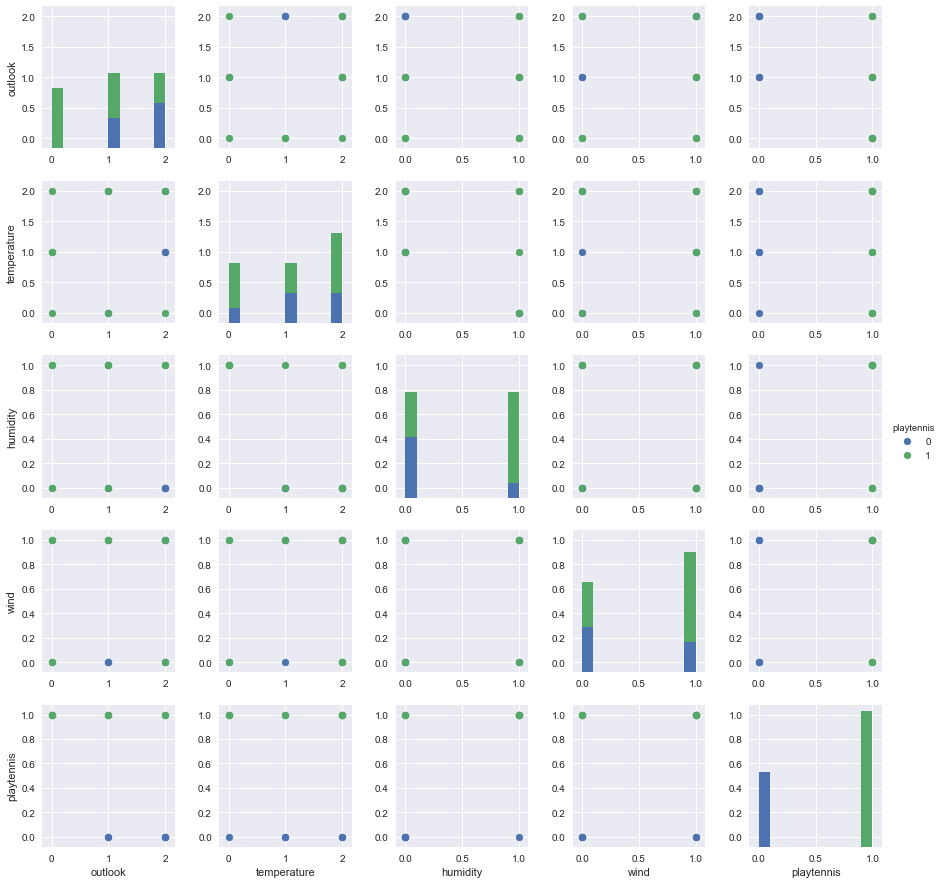

In [4]:
import seaborn
seaborn.set(color_codes=True)
g = seaborn.PairGrid(playtennis_transformed, hue="playtennis")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

## Membuat _Classifier Decision Tree dan ANN.

Skema _Full Training_.

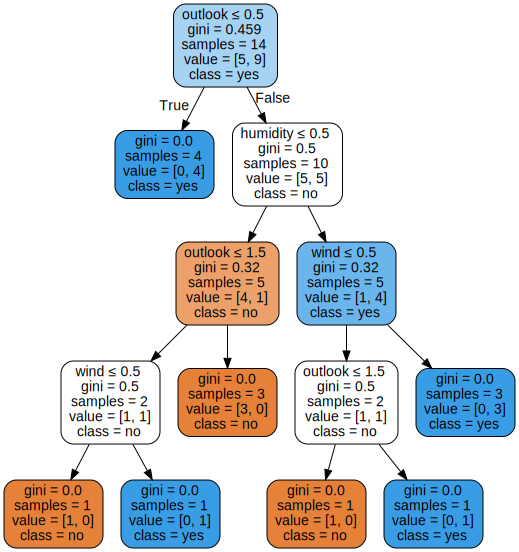

In [5]:
from sklearn import tree
dtl = tree.DecisionTreeClassifier()
dtl.fit(playtennis_train, playtennis_classes)

import graphviz
dot_data = tree.export_graphviz(dtl, out_file=None, 
                         feature_names=playtennis_train.columns.values,  
                         class_names=encoder.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [6]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(playtennis_train, playtennis_classes)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [7]:
ann.coefs_

[array([[-0.13550079,  0.00099321, -0.81629954, -0.3227855 , -0.49469775],
        [-0.53482092, -0.70828209, -0.2521951 , -0.31046607,  0.01149222],
        [-0.0065751 ,  0.60225994, -0.48262138,  0.33721485, -0.77176312],
        [ 0.40924777,  0.01155045,  0.09583888, -0.72912846, -0.55351094]]),
 array([[ 0.73066037, -0.8446235 ],
        [-0.85349395, -0.81169676],
        [ 0.70017505, -0.74370779],
        [-0.14607845,  0.66642695],
        [ 0.0614094 ,  0.19940107]]),
 array([[ 0.94645242],
        [-1.19663215]])]

In [8]:
ann.intercepts_

[array([ 0.74737327,  0.86967696, -0.30467704,  0.03381831,  0.55843369]),
 array([-0.34159867, -0.22762354]),
 array([ 0.58779669])]

## Membuat Skema Pembelajaran _Split-train_
Split train dengan test 10% dan train 90%

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(playtennis_train, playtennis_classes, test_size=0.10, random_state=42)

In [10]:
from sklearn.metrics import accuracy_score
split = tree.DecisionTreeClassifier()
split = split.fit(X_train, y_train)
y_predict = split.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('Akurasi: {} %'.format(accuracy * 100))

Akurasi: 50.0 %


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=encoder.classes_))

             precision    recall  f1-score   support

         no       0.00      0.00      0.00         0
        yes       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



c:\program files\python\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Confusion matrix, without normalization
[[0 0]
 [1 1]]


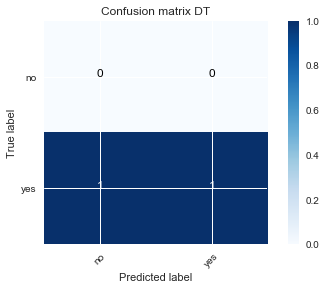

In [12]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_,
                      title='Confusion matrix DT')

In [13]:
ann_split = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann_split.fit(X_train, y_train)
y_ann_predict = ann_split.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_ann_predict)
print('Akurasi: {} %'.format(accuracy_ann * 100))

Akurasi: 50.0 %


In [14]:
print(classification_report(y_test, y_ann_predict, target_names=encoder.classes_))

             precision    recall  f1-score   support

         no       0.00      0.00      0.00         0
        yes       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



c:\program files\python\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtl, playtennis_train, playtennis_classes, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.17)


In [16]:
scores = cross_val_score(ann, playtennis_train, playtennis_classes, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.17)


## _Save_ dan _Load_ Model

In [17]:
from sklearn.externals import joblib
joblib.dump(dtl, 'playtennis_dtl.pkl')
joblib.dump(ann, 'playtennis_ann.pkl')

['playtennis_ann.pkl']

In [18]:
loaded_tree_model = joblib.load('playtennis_dtl.pkl') 
loaded_ann_model = joblib.load('playtennis_ann.pkl') 

## Klasifikasi _Unseen_ Instance

Mengklasifikasikan instans baru dengan dtl skema full train dan ann skema full train.

In [19]:
new_instance_data = {"outlook":[1],"temperature":[1],"humidity":[1],"wind":[1]}
new_instance = pandas.DataFrame(data=new_instance_data, columns = playtennis_train.columns)

print(new_instance.dtypes)

outlook        int64
temperature    int64
humidity       int64
wind           int64
dtype: object


In [20]:
loaded_tree_model.predict(new_instance)

array([1], dtype=int64)

In [21]:
loaded_ann_model.predict(new_instance)

array([1], dtype=int64)